# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

- In this project, we will use Natural Language Processing (NLP) techniques to predict customer sentiment from real Amazon Echo customer reviews.

- AI/ML-based sentiment analysis is crucial for companies to automatically predict whether their customers are happy or not.

- The process could be done automatically without having humans manually review thousands of customer reviews.

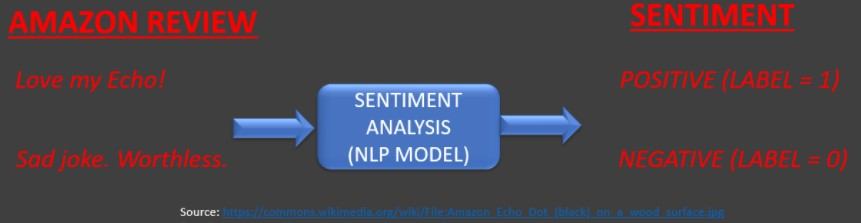

data source: https://www.kaggle.com/datasets/haitaox503/amazonreviewscsv?select=amazon_reviews.csv

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [23]:
# Load the data
reviews_df = pd.read_csv('amazon_reviews.csv')
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [24]:
# View the DataFrame Information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [25]:
# View DataFrame Statistical Summary
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


Here we can see a statistical summary of our data of on numerical columns, meaning that when it comes to the
ratings, we have 3150 count, so I have 3150 rows.
The average rating is around 4.46 approximately. The standard
deviation, which is the dispersion away from the mean is one
approximately. Minimum review is one star.
Maximum review is five star.
And here we have the 25 percentile 50 percentile and 75 percentile as well.
And this gives us an ides that it seems
like on average the customers actually like the product and
that's good news.
On average, the average ratings of around 3000 reviews.
It stands around 4.46 approx.


- **Drop the 'date' column from the DataFrame** 
- **Ensure that the column has been succesfully dropped** 

In [26]:
reviews_df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [27]:
reviews_df.drop("date", axis=1, inplace=True)

In [28]:
reviews_df.columns

Index(['rating', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [31]:
# alternative way of dropping columns
# reviews_df = reviews_df.drop(['date'], axis=1)

# TASK #3: PERFORM DATA VISUALIZATION

In [34]:
# Ensure that there is no missing data
reviews_df.isnull()

,rating,variation,verified_reviews,feedback
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
3145,False,False,False,False
3146,False,False,False,False
3147,False,False,False,False
3148,False,False,False,False


__True__ means null value. __False__ means not null value.

<AxesSubplot:>

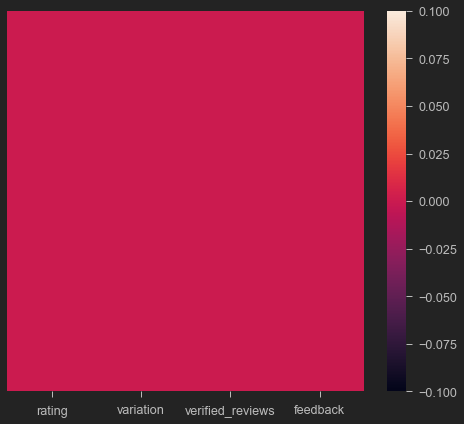

In [32]:
# Visualize the missing data
sns.heatmap(reviews_df.isnull(), yticklabels=False)

The visual above indicates there is no missing values.

<AxesSubplot:xlabel='rating', ylabel='count'>

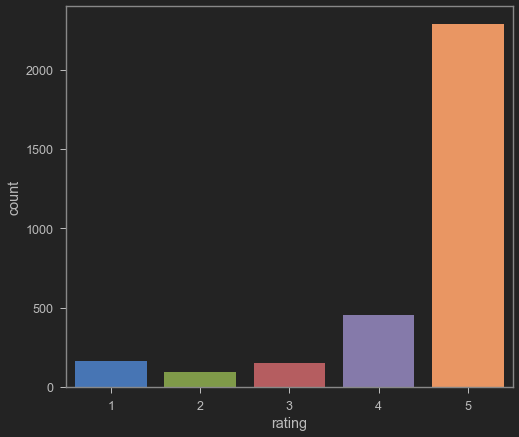

In [36]:
# Plot the count plot for the ratings
sns.countplot(x = reviews_df['rating'])

Here we see that we have five unique categories in __Rating__ column.

And what we got here is the count on how many rows per category.

Here we can also see that a lot of customers are actually happy with the product. (5 means high rating)
A lot of customers, maybe 2500 or so gave five stars
Around maybe 500 customers gave it four stars and very few
customers who are not happy which gave it one star
or two stars.

- **Plot the countplot for the feedback column**
- **Roughly how many positive and negative feedback are present in the dataset?**

<AxesSubplot:xlabel='feedback', ylabel='count'>

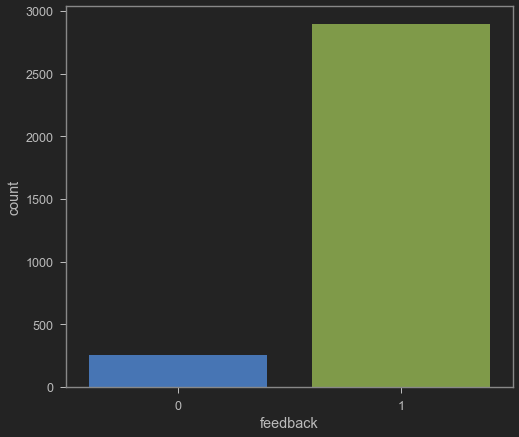

In [37]:
sns.countplot(x = reviews_df['feedback'])

What we can see here is a lot of customers
are actually happy or satisfied with the product and it looks
like maybe we have around 2800.
Again the question asked you to roughly say that.
And we have around maybe 250 approximately kind of half
the distance between zero and 500 customers who are not happy with the product.


# TASK #4: PERFORM DATA EXPLORATION

In [38]:
# Let's get the length of the verified_reviews column
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)

In [39]:
reviews_df

,rating,variation,verified_reviews,feedback,length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


<AxesSubplot:ylabel='Frequency'>

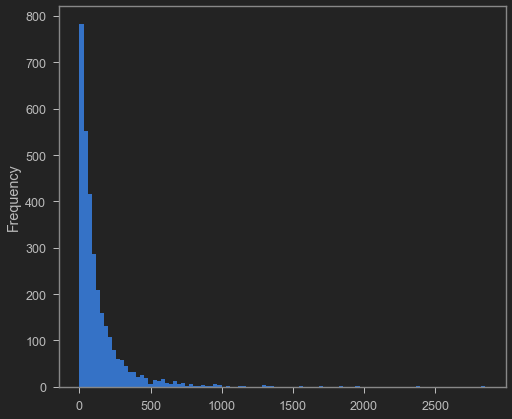

In [40]:
# Plot the histogram for the length
reviews_df['length'].plot(bins = 100, kind = 'hist')

What we notice is a lot of reviews are
actually quite short. Meaning they are like range
between maybe zero and let's say for example,
50.
This essentially indicate that a lot of reviews are
quite relatively short.


And there is some people, some customers who maybe love
the product so much.
So they decided to leave a ton of review, just like a long
review.
Some other customers maybe they are pissed off
and they decided to leave really bad review for quite a long
as well.


In [41]:
# Apply the describe method to get statistical summary
reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


So on average, there is 132 characters in our string.
If you want to check out the min and max the mean is
one and the maximum is 2851.
So there is a customers who maybe love the product so much
and he wrote Almost 3000 characters.
So I'm actually curious to see what's actually going
on in there.


In [42]:
# Let's see the longest message 
reviews_df[reviews_df['length'] == 2851.000000]

,rating,variation,verified_reviews,feedback,length
2016,5,Black Plus,Incredible piece of technology.I have this rig...,1,2851


In [45]:
reviews_df[reviews_df['length'] == 2851.000000]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

- **View the message with the average length**

In [47]:
reviews_df[reviews_df['length'] == 132]['verified_reviews'].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

# TASK #5: PLOT THE WORDCLOUD

In [48]:
# Obtain only the positive reviews
positive = reviews_df[reviews_df['feedback'] == 1]

In [49]:
positive

,rating,variation,verified_reviews,feedback,length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


In [50]:
# Obtain the negative reviews only
negative = reviews_df[reviews_df['feedback'] == 0]

In [51]:
negative

,rating,variation,verified_reviews,feedback,length
46,2,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,Charcoal Fabric,Not much features.,0,18
162,1,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...
3047,1,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,Black Dot,The only negative we have on this product is t...,0,240
3091,1,Black Dot,I didn’t order it,0,17


In [57]:
# Convert to list format
positive_sentences = positive['verified_reviews'].tolist()
len(positive_sentences)

2893

In [58]:
# Join all reviews into one large string
postive_sentences_as_one_string = ' '.join(positive_sentences)

In [59]:
postive_sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

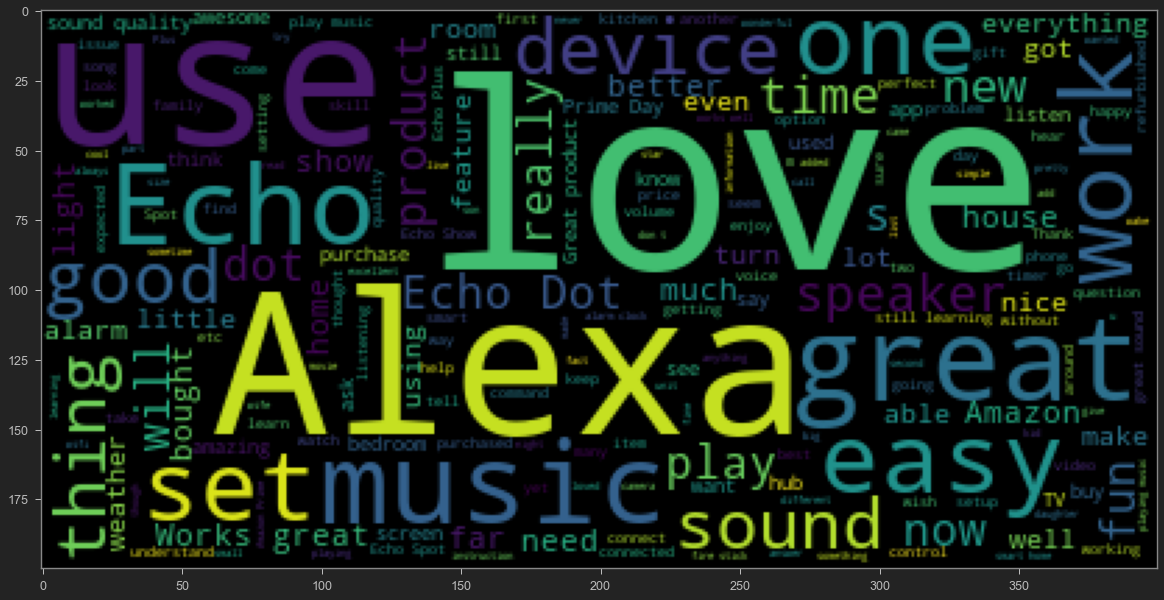

In [61]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(postive_sentences_as_one_string))

- **Plot the wordcloud of the "negative" dataframe** 

In [62]:
negative_sentences = negative['verified_reviews'].tolist()
len(negative_sentences)

257

In [63]:
negative_sentences_as_one_string = ' '.join(negative_sentences)

In [64]:
negative_sentences_as_one_string

'It\'s like Siri, in fact, Siri answers more accurately then Alexa.  I don\'t see a real need for it in my household, though it was a good bargain on prime day deals. Sound is terrible if u want good music too get a bose Not much features. Stopped working after 2 weeks ,didn\'t follow commands!? Really fun when it was working? Sad joke. Worthless. Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa. It\'s got great sound and bass but it doesn\'t work all of the time. Its still hot or miss when it recognizes things I am not super impressed with Alexa. When my Prime lapsed, she wouldn\'t play anything. She isn\'t smart enough to differentiate among spotify accounts so we can\'t use it for that either. She r

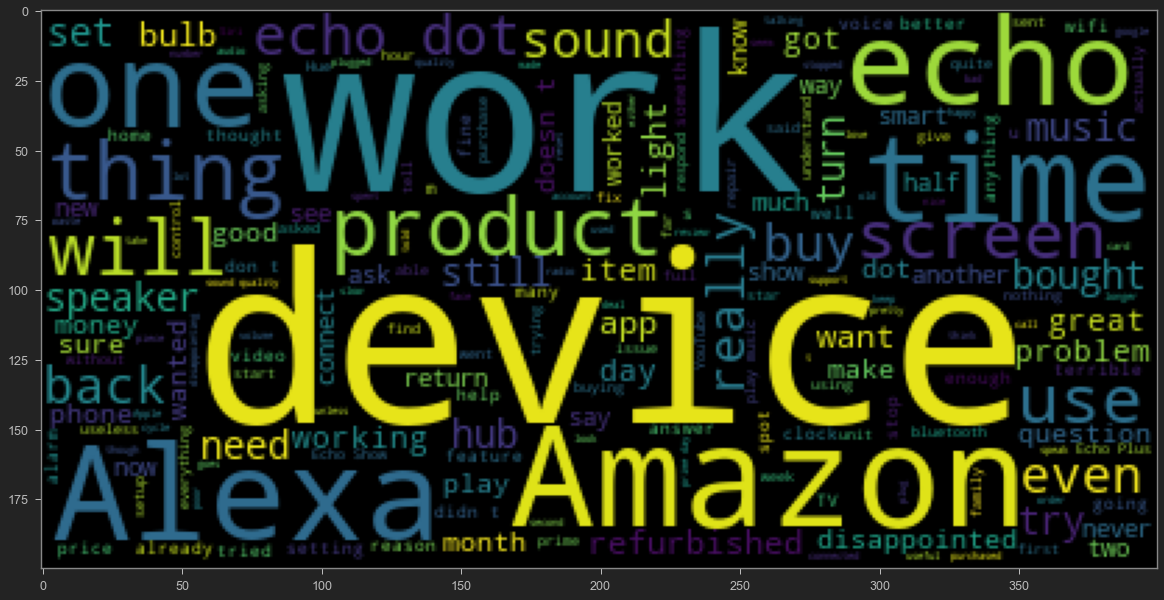

In [67]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

# TASK #6: TEXT DATA CLEANING 101

In [68]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Here we imported all the different punctuations
in the english language.


What we wanted to do is before we take our
verified reviews and feed it into our machine
learning model, we wanted to clean up the data first.
We wanted to remove all the punctuations from text first.


In [69]:
# Example
Test = '$I love data science &and making projects...!!!'

In [70]:
Test_punc_removed = [char for char in Test if char not in string.punctuation   ]
Test_punc_removed

['I',
 ' ',
 'l',
 'o',
 'v',
 'e',
 ' ',
 'd',
 'a',
 't',
 'a',
 ' ',
 's',
 'c',
 'i',
 'e',
 'n',
 'c',
 'e',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'm',
 'a',
 'k',
 'i',
 'n',
 'g',
 ' ',
 'p',
 'r',
 'o',
 'j',
 'e',
 'c',
 't',
 's']

In [72]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'I love data science and making projects'

The next thing we want to do is to remove what we call stopwords.
These are common words that don't add much value
when we train a machine learning model such as for example, __I__,
__you__, __we__, all these are genetic common words, we call
stopwords. It's a common practice to remove
these stopwords in machine learning projects.


In [73]:
import nltk # Natural Language tool kit

In [74]:
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [77]:
Test_for_stopwords = 'I have been enjoying these coding, programming and ML projects using jupyter notebook.'

In [78]:
Test_for_stopwords_clean = [word for word in Test_for_stopwords.split() if word.lower() not in stopwords.words('english')  ]

In [79]:
Test_for_stopwords_clean

['enjoying',
 'coding,',
 'programming',
 'ML',
 'projects',
 'using',
 'jupyter',
 'notebook.']

# TASK #7: PERFORM COUNT VECTORIZATION (TOKENIZATION)

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [83]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'paper', 'second', 'the', 'third', 'this']


In [84]:
print(X.toarray())

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


- **Without doing any code, perform count vectorization for the following list:**
    -  mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

In [85]:
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

vectorizer = CountVectorizer()
Y = vectorizer.fit_transform(mini_challenge)

In [86]:
print(vectorizer.get_feature_names())

['hello', 'world']


C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [87]:
print(Y.toarray())

[[1 1]
 [2 1]
 [1 3]]


# TASK #8: CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [88]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [89]:
# Let's test the newly added function
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [90]:
# show the original review
print(reviews_df['verified_reviews'][5])

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [91]:
# show the cleaned up version
print(reviews_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


What I wanted to do next is I'm gonna apply agan
the same pipeline to do the count vectorizer
which is what we have done in Task 7.


In [92]:
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [93]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


These are all the different unique
names that I have in my count vectorizer.
So we see here these are all the different
unique ones in the entire corpus in every single review
that every single customer has.
These are all the different words and if we print these
to array, we end up with a bunch of numbers.


In [94]:
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


These numbers are the numbers
that we're going to use to train our machine learning model.
This is simply the tokenized version of the entire text data
that I have for all customers.

In [95]:
reviews_countvectorizer.shape

(3150, 5211)

And here we have the shape which is 3000 reviews
and we have around 5211 columns. That's a large amount of data set.


In [100]:
# Convert array to dataframe
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

Then we take
the reviews and put it in X.
That simply is going to be my inputs to the model.

In [102]:
X = reviews

In [103]:
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


And the output from my model is what I will use to predict the sentiment. I just wanted to see if the customers are
happy or not.

In [104]:
y = reviews_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

__X__ is the inputs and __y__ is the outputs. Which is a bunch of zeros and ones
that indicates the output for my model. So now we are ready to train a naive based
classified model.


In [106]:
# Apply the describe method to get statistical summary
reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


- **What is the shape of X and Y**

In [107]:
X.shape

(3150, 5211)

In [108]:
y.shape

(3150,)

The result of the __X.shape__ shows we have 3150 rows and 5211 columns.

The result of the __y.shape__ shows we have 3150 outputs. That makes sense because every single text data, every single row
has a simple output corresponding to it as well.

# TASK #9: TRAIN AND TEST NAIVE BAYES CLASSIFIER MODEL

And now we're pretty much ready to go ahead and train our
model. So the first step that we want to do is that we want
to divide our data sets into training and testing.
So in general when we train any machine learning model we use
most of the data set perhaps around let's say 80% of the data
to train our model. And then the remaining 20% we use them
for testing.
And this is very important to make sure that our model is not
overfitting the training data. Meaning the model still
performs quite well even if the data has never been seen
by the model before.
And that's why the actual true assessment of the model is
on the testing data set which is new, unique dataset.


In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

And then next let's import MultinomialNB. After I imported my class, I'm going to instantiate
an object out of my class.


In [115]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)


MultinomialNB()

So now our model has been successfully trained and now I'm
ready to assess or test our model
performance.

But before we do that, let's understand what confusion matrix is.
The confusion matrix is simply a visual representation
of our classifier model performance. What we have
here on the rows are our predictions.
And columns are our true class.

When I say True class that means this is essentially
the ground truth.
That's what actually happened in reality, what's happened
in real life.

And the (True +, False -) are the model predictions.
If the model predictions matches our true class,
that's amazing news.
That means I have a good model.

The diagonal elements here \[True +, True -\].
These are the good stuff.
That's when the model predictions matches what's happening
in real life.

However, sometimes my model messes up.
My model might say, let's say it's the prediction is positive.
However, in real life, it was negative and this is what
we call it false positive or type one error.
Same deal as well.
If the model predicted negative and the true class was
positive, we call that false negative and we call that type
two error.


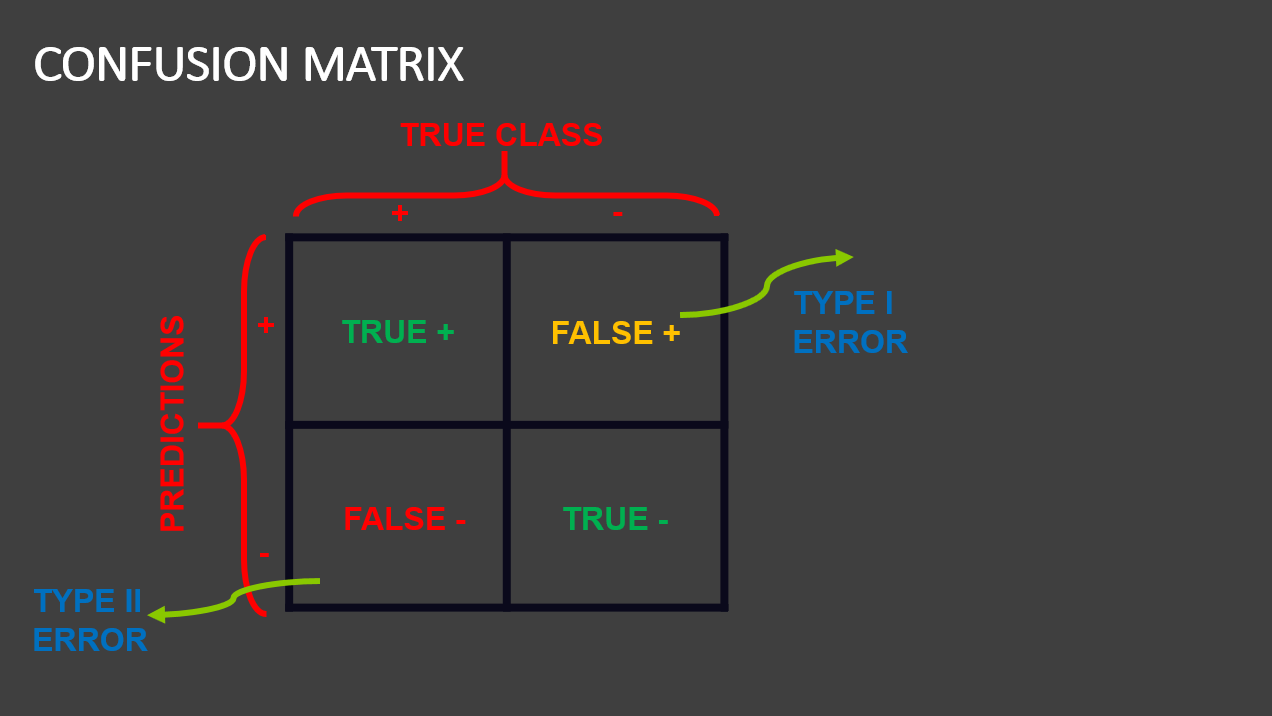

In [116]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

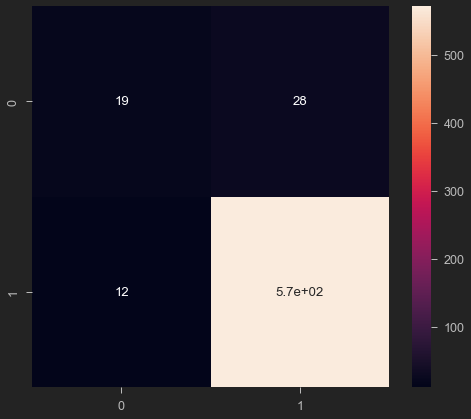

In [117]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

So what we see here is I was able to train
a naive base classified model to generate predictions.
And this is simply the model predictions.
So it looks like the model was able to Correently classify
19 samples plus um Around 570 samples here as well.
And it has misclassified 28 and 12.
So these are the wrong ones I would say.
And these are the correct classification.
The next step is I can go ahead and print what we call it.
Classification reports.


In [118]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.61      0.40      0.49        47
           1       0.95      0.98      0.97       583

    accuracy                           0.94       630
   macro avg       0.78      0.69      0.73       630
weighted avg       0.93      0.94      0.93       630



Here we see the overall performance of our model.

It looks like that when it comes to the overall
accuracy of the model, we're talking about the weighted
average round .93.
The macro is around .78.
The precision is 0.95 on class one and .53 in class zero.
And recall, we're talking about 0.36 and 0.97.

So of course these results could be dramatically improved by using a different perhaps classified model.

- **Train a logistic Regression classifier and assess its performance**

              precision    recall  f1-score   support

           0       0.81      0.45      0.58        47
           1       0.96      0.99      0.97       583

    accuracy                           0.95       630
   macro avg       0.88      0.72      0.77       630
weighted avg       0.95      0.95      0.94       630



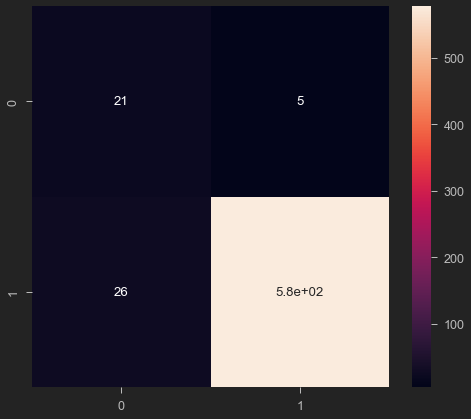

In [119]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

Here we see that our macro avg is 0.88 and weighted avg is 0.95 which is slightly better.
Of course depending on if you are trying to optimize for precision
for example or are you trying to optimize for recall. F one score is the harmonic mean
between precision and recall. So overall F one score is 0.97 on class and 0.58 on class
zero.